In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df= pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df['customerID'].nunique()

7043

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [8]:
df.drop('customerID',axis=1,inplace=True)

In [9]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- There are few missing values in Monthly charges

In [10]:
for i in df.columns:
    vc= df[i].value_counts()
    print(vc)
    print('=='*50)

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No            

## Handling Missing Values

In [11]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [12]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [13]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

-There are no null values

## Data Visualization 

<AxesSubplot:xlabel='Churn', ylabel='count'>

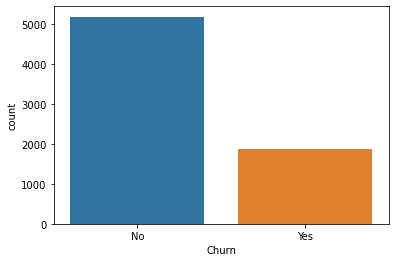

In [14]:
sns.countplot(df['Churn'])

- the label is imbalanced and will require to be treated
- 0 represents No and 1 represents yes

<AxesSubplot:xlabel='gender'>

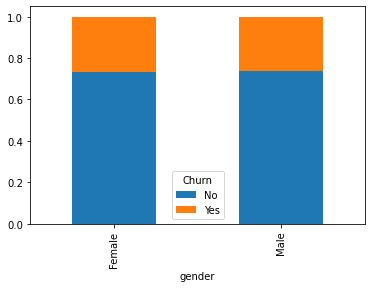

In [15]:
pd.crosstab(df['gender'],df['Churn'], normalize='index').plot.bar(stacked=True)


- There is no significant relation based on gender and churn

In [12]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='SeniorCitizen'>

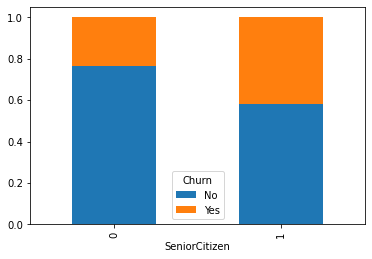

In [16]:
pd.crosstab(df['SeniorCitizen'],df['Churn'], normalize='index').plot.bar(stacked=True)


<AxesSubplot:xlabel='Partner'>

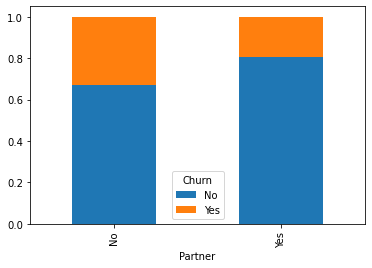

In [14]:
pd.crosstab(df['Partner'],df['Churn'], normalize='index').plot.bar(stacked=True)


- we see that the percentage of people who do not have partner, churn out more often

<AxesSubplot:xlabel='Dependents'>

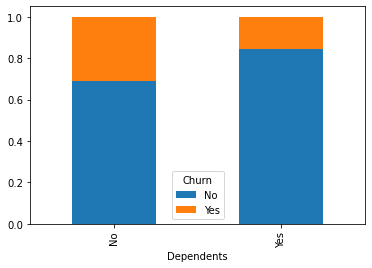

In [15]:
pd.crosstab(df['Dependents'],df['Churn'], normalize='index').plot.bar(stacked=True)


- More percentage of people churn out when they have dependents

<AxesSubplot:xlabel='PhoneService'>

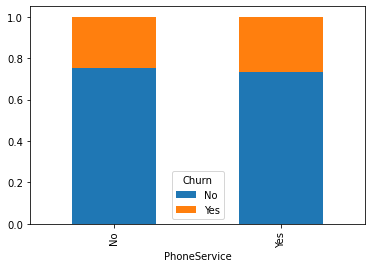

In [16]:
pd.crosstab(df['PhoneService'],df['Churn'], normalize='index').plot.bar(stacked=True)


<AxesSubplot:xlabel='MultipleLines'>

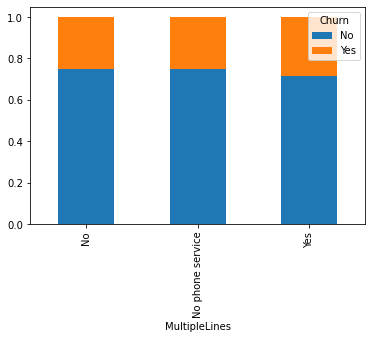

In [17]:
pd.crosstab(df['MultipleLines'],df['Churn'], normalize='index').plot.bar(stacked=True)


<AxesSubplot:xlabel='InternetService'>

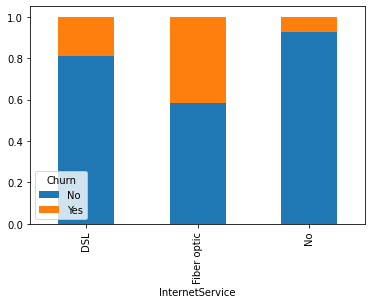

In [18]:
pd.crosstab(df['InternetService'],df['Churn'], normalize='index').plot.bar(stacked=True)


- People using fiberoptic is seen to churn out more as in comparison to others

<AxesSubplot:xlabel='OnlineSecurity'>

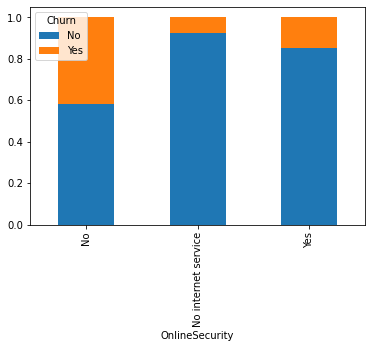

In [19]:
pd.crosstab(df['OnlineSecurity'],df['Churn'], normalize='index').plot.bar(stacked=True)


- People who do not have online security are prone to churn out

<AxesSubplot:xlabel='OnlineBackup'>

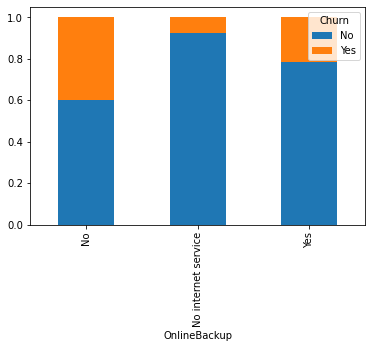

In [20]:
pd.crosstab(df['OnlineBackup'],df['Churn'], normalize='index').plot.bar(stacked=True)


- People who do not have online back up are seen to churn more

<AxesSubplot:xlabel='DeviceProtection'>

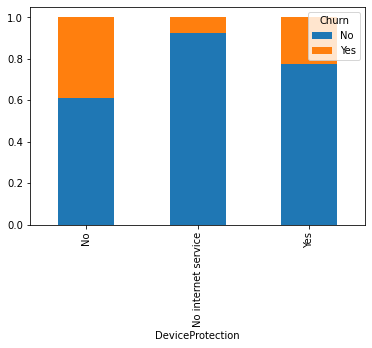

In [21]:
pd.crosstab(df['DeviceProtection'],df['Churn'], normalize='index').plot.bar(stacked=True)


- People who do not have device protection are  seen to churn more

<AxesSubplot:xlabel='TechSupport'>

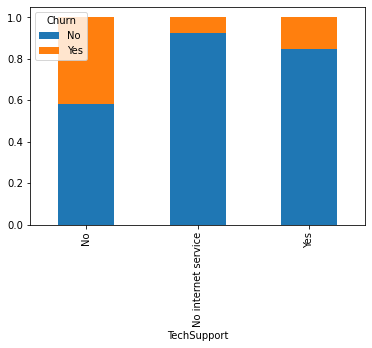

In [22]:
pd.crosstab(df['TechSupport'],df['Churn'], normalize='index').plot.bar(stacked=True)


- people who do not get tech support are seen to churn more often. This tells us people will feel more at ease in using a service if its easy to reach out for tech support

<AxesSubplot:xlabel='StreamingTV'>

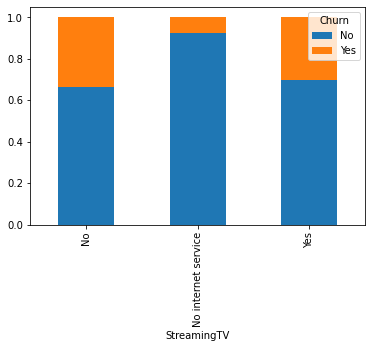

In [23]:
pd.crosstab(df['StreamingTV'],df['Churn'], normalize='index').plot.bar(stacked=True)


<AxesSubplot:xlabel='StreamingMovies'>

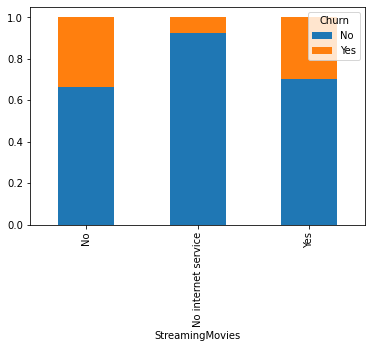

In [24]:
pd.crosstab(df['StreamingMovies'],df['Churn'], normalize='index').plot.bar(stacked=True)


<AxesSubplot:xlabel='Contract'>

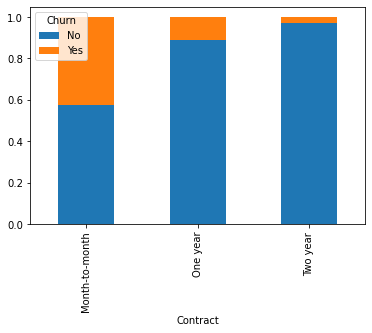

In [25]:
pd.crosstab(df['Contract'],df['Churn'], normalize='index').plot.bar(stacked=True)


- Churn percentage is seen to be significatly less when the contract is of 2 years.
- month-to-month is seen to be more, mostly because it causes inconvieniece

<AxesSubplot:xlabel='PaperlessBilling'>

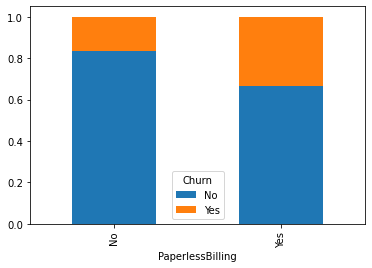

In [26]:
pd.crosstab(df['PaperlessBilling'],df['Churn'], normalize='index').plot.bar(stacked=True)


<AxesSubplot:xlabel='PaymentMethod'>

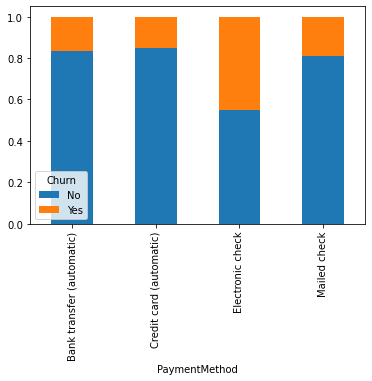

In [27]:
pd.crosstab(df['PaymentMethod'],df['Churn'], normalize='index').plot.bar(stacked=True)


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

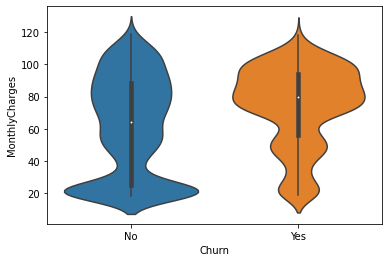

In [34]:
sns.violinplot(x='Churn', y='MonthlyCharges',data=df)

- Churn is predominant when monthly charges is high, and while its seen less when the monthly charge is low

## Encoding

In [17]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
    

    

## Distribution of data

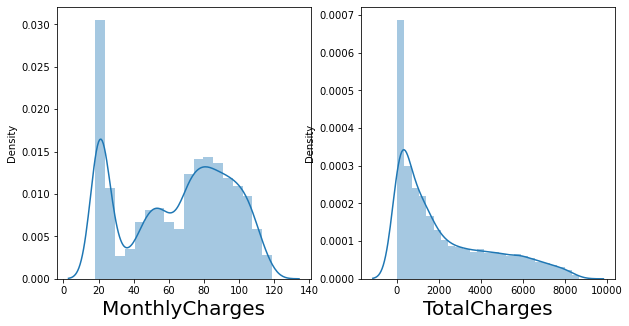

In [19]:
numeric = df[[ 'MonthlyCharges','TotalCharges']]

plt.figure(figsize =(10,5), facecolor='white')
plotnumber=1
for i in numeric.columns:
    if plotnumber <= 2:
        ax = plt.subplot(1,2,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    
    plotnumber +=1
plt.show()

In [20]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

- most of the columns are categorical and hence skewness handling is not necessary

## Correlation

<AxesSubplot:>

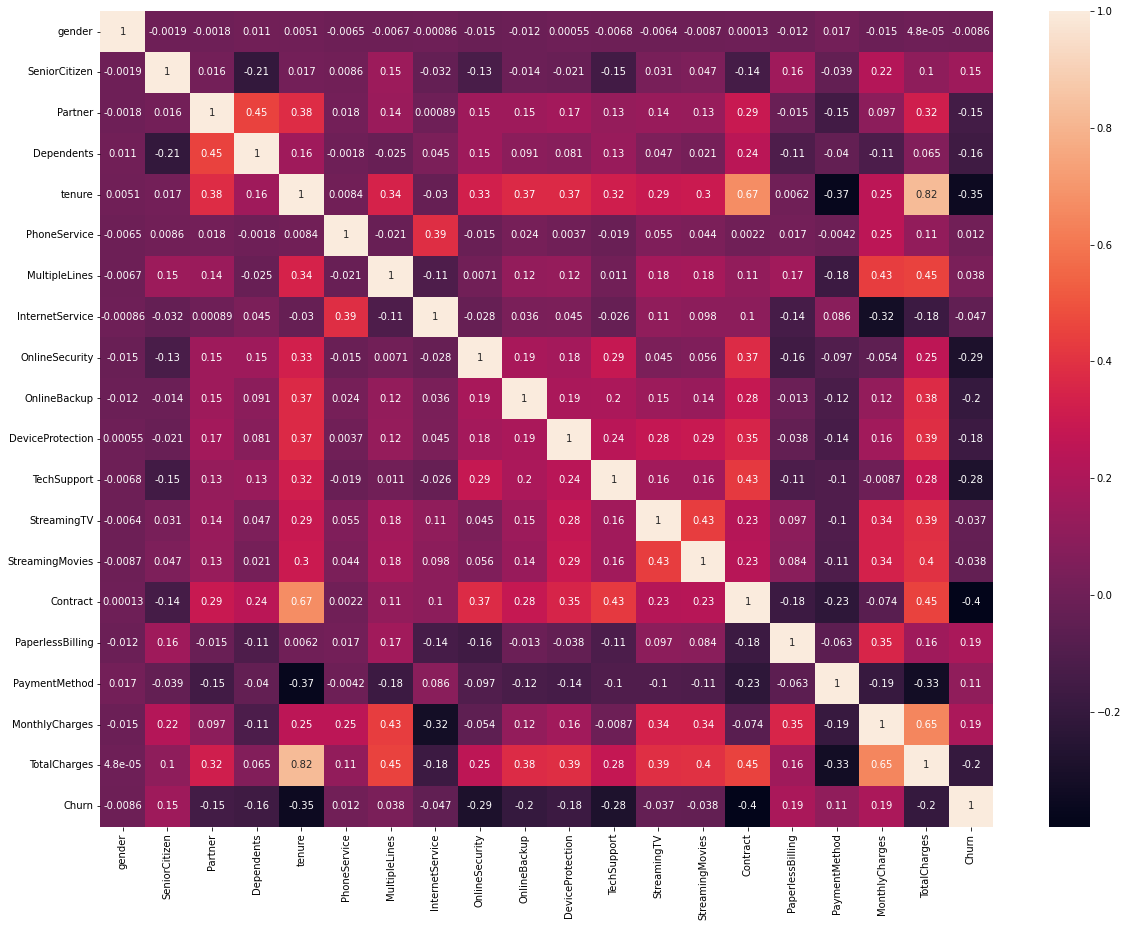

In [21]:
plt.figure(figsize= (20,15))
corr = df.corr()
sns.heatmap(corr, annot=True)

- There seems to be high correlation between tenure and Total Charges

<AxesSubplot:>

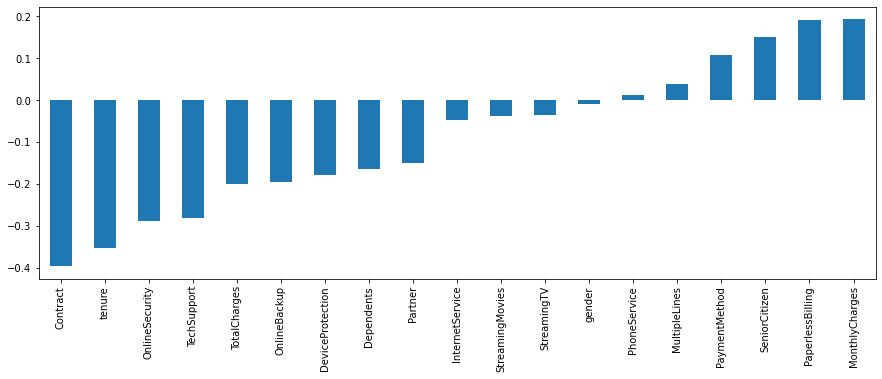

In [22]:
plt.figure(figsize = (15,5))
df.corr()['Churn'].sort_values(ascending = True).drop(['Churn']).plot(kind ='bar')

## Splitting data into feature and label

In [23]:
X =df.drop('Churn',axis=1)
y = df['Churn']

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x= scaler.fit_transform(X)

In [25]:
x= pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994971
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173876
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.960399
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.195400
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.941193


- Our data is now scaled we can move to building the model

In [26]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

x,y = SMOTE().fit_resample(x,y)


<AxesSubplot:xlabel='Churn', ylabel='count'>

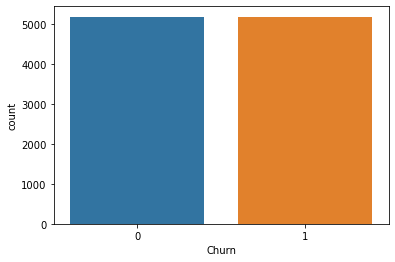

In [27]:
sns.countplot(y,data = df)

## Model Building

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


### Selecting the best random state

In [29]:
MaxAcc = 0
MaxRS =0
for i in range(1,200):
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf= rf.predict(X_test)
    acc= accuracy_score(y_test,predrf)
    print('accuracy',acc,'random_state',1)
    
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRS= i
        print('accuracy',MaxAcc,'random_state',i)

accuracy 0.8526570048309179 random_state 1
accuracy 0.8526570048309179 random_state 1
accuracy 0.8618357487922705 random_state 1
accuracy 0.8618357487922705 random_state 2
accuracy 0.8381642512077294 random_state 1
accuracy 0.8555555555555555 random_state 1
accuracy 0.8507246376811595 random_state 1
accuracy 0.8545893719806763 random_state 1
accuracy 0.8434782608695652 random_state 1
accuracy 0.8589371980676328 random_state 1
accuracy 0.8560386473429952 random_state 1
accuracy 0.8565217391304348 random_state 1
accuracy 0.8502415458937198 random_state 1
accuracy 0.855072463768116 random_state 1
accuracy 0.8541062801932368 random_state 1
accuracy 0.8468599033816425 random_state 1
accuracy 0.8502415458937198 random_state 1
accuracy 0.8483091787439614 random_state 1
accuracy 0.8545893719806763 random_state 1
accuracy 0.8439613526570048 random_state 1
accuracy 0.8449275362318841 random_state 1
accuracy 0.8594202898550725 random_state 1
accuracy 0.8391304347826087 random_state 1
accuracy 0.8

In [30]:
print('Maximum accuracy',MaxAcc,'Random state: ',MaxRS)

Maximum accuracy 0.8719806763285024 Random state:  110


In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =110)

In [33]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Accuracy', accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))



Accuracy 0.793719806763285
[[780 266]
 [161 863]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1046
           1       0.76      0.84      0.80      1024

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070



In [ ]:
RandomForestClassifier

In [116]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Accuracy', accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))



Accuracy 0.8367149758454107
[[832 186]
 [152 900]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1018
           1       0.83      0.86      0.84      1052

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



In [34]:
algorithm = [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),SVC()]
for i in algorithm:
    print(i)
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    
    print('Accuracy: ',accuracy_score(y_test,pred))
    print('Confusion matrix: \n',confusion_matrix(y_test,pred))
    print('Classification report: \n',classification_report(y_test,pred))
    cv = cross_val_score(i,x,y,cv=7)
    
    print('Cross Validation Score: \n', cv.mean())
    print('Difference in cross val score', accuracy_score(y_test,pred)- abs(cv.mean()))
    print('**'*50)

LogisticRegression()
Accuracy:  0.793719806763285
Confusion matrix: 
 [[780 266]
 [161 863]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      1046
           1       0.76      0.84      0.80      1024

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070

Cross Validation Score: 
 0.7765764978008374
Difference in cross val score 0.017143308962447645
****************************************************************************************************
RandomForestClassifier()
Accuracy:  0.8714975845410629
Confusion matrix: 
 [[904 142]
 [124 900]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1046
           1       0.86      0.88      0.87      1024

    accuracy                           0.87      2070
   macro avg     

- KNN and SVC had fairly close cross validation score. Since accuracy is better for SVC, it was selected as the best model
- SVC accuracy is 81.83% and cross validation score is 80.70

### Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid ={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001], 'kernel':['rbf']}

In [38]:
grid = GridSearchCV(SVC(),param_grid,refit= True, verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   8.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.658 total time=   8.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   8.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.668 total time=   7.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.664 total time=   8.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.795 total time=   5.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.771 total time=   5.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.788 total time=   5.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   5.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.772 total time=   5.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.774 total time=   5.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [39]:
print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [40]:
print(grid.best_estimator_)

SVC(C=10, gamma=1)


In [42]:
grid_pred = grid.best_estimator_.predict(x_test)
accuracy_score(y_test,grid_pred)

0.8845410628019323

- our score has improved from 81% to 88.45%. We will save this as the best model

## Model Saving

In [43]:
import joblib

In [44]:
joblib.dump(grid.best_estimator_,'CustomerChurn.pkl')

['CustomerChurn.pkl']